In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

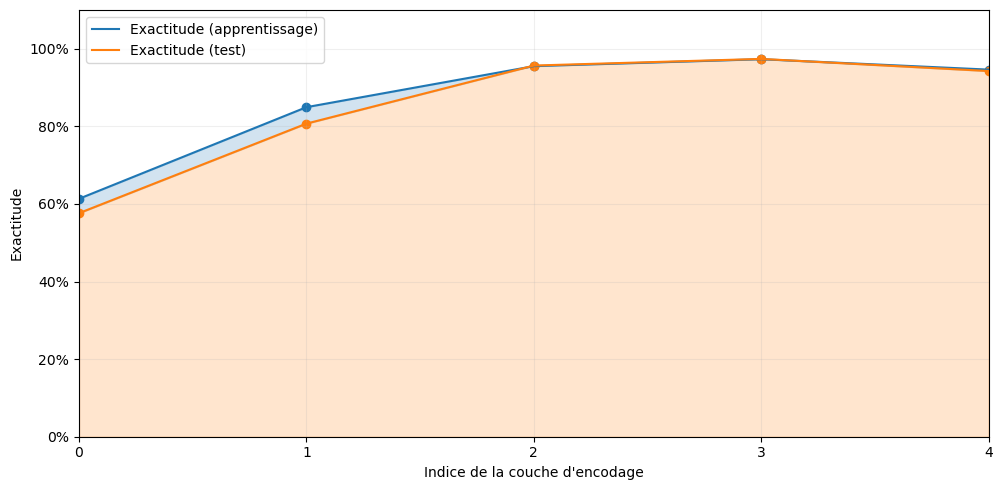

In [26]:
scores = pd.read_csv('Encoder_Model_ALL.csv')
plotted_scores = scores[['encoder_layer', 'val_score', 'train_score']]

x = plotted_scores['encoder_layer']
plt.plot(x, plotted_scores['train_score']*100, label="Exactitude (apprentissage)")
plt.fill_between(x, plotted_scores['train_score']*100,  plotted_scores['val_score']*100, alpha=0.2, color='C0')
plt.scatter(x, plotted_scores['train_score']*100, color="C0")
plt.plot(x, plotted_scores['val_score']*100, label="Exactitude (test)")
plt.scatter(x, plotted_scores['val_score']*100, color="C1")

plt.fill_between(x, [0]*len(x),  plotted_scores['val_score']*100, alpha=0.2, color='C1')

ax = plt.gca()
ax.set_xticks(x)
plt.xlim(0, 4)
plt.ylim(0, 110)

plt.xlabel("Indice de la couche d'encodage")
plt.ylabel("Exactitude")
plt.gcf().set_size_inches((10, 5))
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('accuracy_dataset_classif.png')

In [11]:
scores

,Unnamed: 0,encoder_layer,val_score,train_score
0,0,0,0.576322,0.613419
1,1,1,0.807148,0.849521
2,2,2,0.956813,0.955272
3,3,3,0.973939,0.973163
4,4,4,0.942666,0.946326


In [27]:
import numpy as np

prob_result = np.load('probing_result.pkl.npy', allow_pickle=True).item()

In [28]:
r = {d:(v[0].item(), v[1][i].numpy()) for i, (d, v) in enumerate(prob_result.items())}
r

{'IDRID': (0.8250186443328857, array([1108,    4,   26,  205,    0])),
 'MESSIDOR': (0.6515264511108398, array([ 43, 875, 137, 288,   0])),
 'DDR': (0.7505584359169006, array([  62,    2, 1008,  271,    0])),
 'FGADR': (0.7930007576942444, array([  13,    2,  188, 1065,   75])),
 'RETINAL_LESIONS': (0.6574832201004028, array([  0,   1,   9, 450, 883]))}

In [29]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook, show

In [30]:
r_conversion = {k:v[1] for k, v in r.items()}

acc = {k:v[0] for k,v in r.items()}
acc
r_conversion

{'IDRID': array([1108,    4,   26,  205,    0]),
 'MESSIDOR': array([ 43, 875, 137, 288,   0]),
 'DDR': array([  62,    2, 1008,  271,    0]),
 'FGADR': array([  13,    2,  188, 1065,   75]),
 'RETINAL_LESIONS': array([  0,   1,   9, 450, 883])}

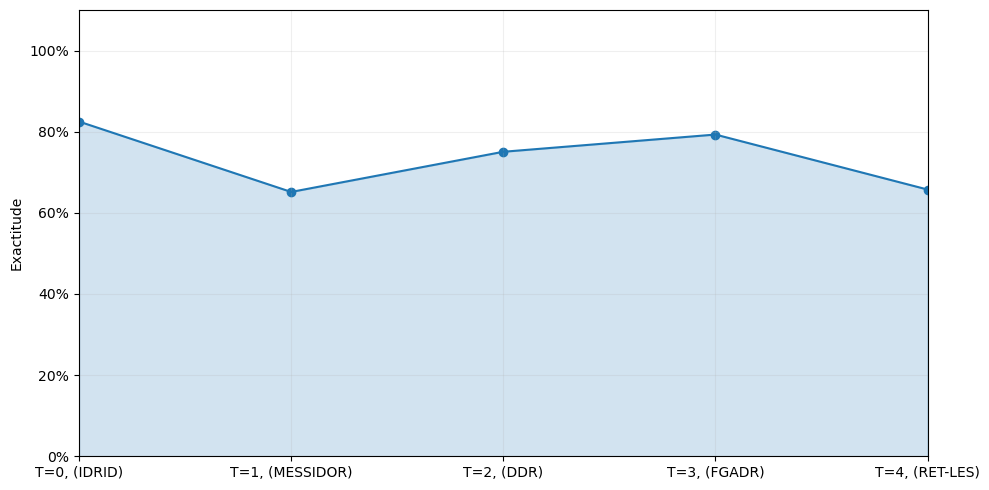

In [43]:
def big_label(i):
    s = f"T={i}, ({rename(list(r_conversion.keys())[i])})"
    return s

def rename(s):
    return s.replace('RETINAL_LESIONS', 'RET-LES')

x = [big_label(i) for i in range(len(r_conversion))]


y = np.asarray(list(acc.values()))*100
plt.plot(x, y)
plt.scatter(x, y)

plt.fill_between(x, y, alpha=0.2, color='C0')
plt.grid(alpha=0.2)

plt.ylabel("Exactitude")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gcf().set_size_inches((10, 5))

plt.xlim(0, 4)
plt.ylim(0, 110)
plt.tight_layout()
plt.savefig('accuracy_probe_after_convert.png')
